In [271]:
"""
NTNU 110-2 Data Visualization
Homework 1
by 40847041S 朱自宇
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
""" 
Question 1
"""

# Read the data into a data frame. (3pts)
airBox = pd.read_csv(".\\airBoxData.csv")


In [ ]:
# Display all records sorted by the PM2.5 values. (3pts)
airBox.sort_values(["PM2.5"], ascending=True)

In [ ]:
# Calculate and show how many devices in each city. (7pt)

# delete unnecessary columns, only keep siteID and area
SortByArea = airBox.drop(columns=["year","month","day","hour","weekday","gps_lat","gps_lon","PM10","Tmp","PM2.5","PM1.0","RH"])
SortByArea.sort_values(["area"], ascending=True)
SortByArea = SortByArea.drop_duplicates()


# count Site for each areas
count = 0
City = []
numSite = []
for i in SortByArea["area"]:
    if i in City:
        count+=1
    else:
        City.append(i)
        if i == "changhua":
            pass    
        else:
            numSite.append(count)
            count = 0
numSite.append(count)


# output the result
siteInCity = dict()
siteInCity["City"] = City
siteInCity["SiteCount"] = numSite
pd.DataFrame(siteInCity)


In [ ]:
# Display the average PM2.5 values (over the whole time span) of each device and sort them by the PM2.5 values.
# You can identity which device location with the best/worst PM2.5 quality and observe some  unreasonable measurements. (7pts)

# delete unnecessary columns, only keep siteID, area and PM2.5
SortByPM25 = airBox.drop(columns=["year","month","day","hour","weekday","gps_lat","gps_lon","PM10","Tmp","PM1.0","RH"])
SortByPM25.sort_values(["siteID"], ascending=True)
# count Site for each areas
count = 0
total = 0
Site = []
avgPM25 = []
area = []

for i in SortByPM25["siteID"]:
    if i in Site:
        pass    
    else:
        Site.append(i)
        filter = (SortByPM25["siteID"] == str(i) )
        temp = SortByPM25[filter]
        for k in temp["PM2.5"]:
            total += int(k)
            count += 1
        avgPM25.append(total/count)
        total = 0; count = 0
        
# output the result
siteAvgPM25 = dict()
siteAvgPM25["siteID"] = Site
siteAvgPM25["avgPM2.5"] = avgPM25
pd.DataFrame(siteAvgPM25).sort_values(["avgPM2.5"],ascending=True)

In [ ]:
# Observing the result of last part

# As we can see, there are a lot of site who's ID start with 74DA has very low PM2.5!
# So, let's check these sites.

# select the sites whose average PM2.5 value is zero.
PM25is0 = airBox[airBox["siteID"].isin(["74DA38B050CC","74DA3895C32A","74DA38E2B588","74DA38E2B622","74DA38B05352","74DA38E69E48","74DA38B05436","08BEAC028A0C","74DA38AF486A"])]
areaPM25is0 = []
for i in PM25is0["area"]:
    if i in areaPM25is0:
        pass
    else:
        areaPM25is0.append(i)
        
print(areaPM25is0)
print("As we can see above, sites whose average PM2.5 value = 0 sits in these cities.")
print("But why are 'new_taipei','taipei' and 'kaohsiung' in these cities? As highly urbanization cities, their air quality should not be so good...")
print("Maybe these sites are set in the mountains, this may explain why some of 'new_taipei' and 'kaohsiung' sites have so good air quality.")
print("As for the 'taipei'... I think that maybe its air quality is so bad that the machine can't handle it, it exceeds the range, so the machine couldn't record it correctly...")

In [147]:
# Display the average PM2.5 values (over the whole time span) of each city and sort them by the PM2.5 values.
# You can identity which city has the best/worst air quality. (10pts)

# initialize
cityname = []       # city
cityPM25mean = []   # PM2.5 mean of each City

# also calculate average PM2.5 of weekday
cityAvgPM25 = dict()
cityAvgPM25["City"] = cityname
cityAvgPM25["avgPM2.5"] = cityPM25mean

for i in range(1,8):
    cityAvgPM25[i] = []


# group by city, and calculate the mean of PM2.5 of each city
areagroup = airBox.groupby("area")

for name, group in areagroup:
    temp = areagroup.get_group(name)
    cityname.append(name)
    cityPM25mean.append(temp["PM2.5"].mean())
    day = temp.groupby("weekday")
    for d, g in day:
        bar = day.get_group(d)
        cityAvgPM25[d].append(bar["PM2.5"].mean())
    
    
# output the result
pd.DataFrame(cityAvgPM25).set_index("City").sort_values(["avgPM2.5"],ascending=True)


,avgPM2.5,1,2,3,4,5,6,7
City,,,,,,,,
taitung,2.770677,2.543455,1.385185,1.956292,1.391888,2.417130,5.011990,4.595412
yilan,5.453694,5.303529,5.153990,3.651340,4.874804,4.824270,7.163615,7.228282
chiayi_city,6.490991,3.348923,4.577030,11.391581,10.947861,4.864859,3.896467,6.518670
kaohsiung,7.082535,4.392144,5.079866,9.683610,13.638680,6.035882,3.727815,7.014648
yunlin,7.133232,5.151340,4.774975,11.564468,12.035296,4.181463,4.577745,7.761221
tainan,7.352566,4.241604,5.468158,10.987904,12.293806,5.515009,4.907403,7.988024
chiayi_county,7.557860,4.555480,4.848407,13.769614,12.375564,5.385706,5.028391,7.197897
changhua,8.160436,6.149395,5.385666,8.439990,13.600566,6.616082,7.421002,9.563176
nantou,8.363522,4.636176,5.678992,12.183555,13.253390,7.957659,7.019526,7.988841


In [ ]:
# Observing the result
print("Looks like 'taitung' city has the greatest air quality in Taiwan :)")
print("and the 'new_taipei' city is the worst one :(")
print("City at East and South Taiwan usually has better air quality.")

In [205]:
# Calculate the average PM2.5 of each day within each city.
# List the results by sorting average PM2.5 values in an ascending order within each city,
# i.e. you should put average PM2.5 values of the same city together.(We do not mind the order among cities).
# You can identity which day has the best/worst air quality in each city. (10pts)

    
# calculate the average PM2.5 of each day for every city
areaweekgroup = airBox.groupby(["area"])
for name, group in areaweekgroup:
    print("'",name,"'")
    temp = areaweekgroup.get_group(name).groupby("weekday")
    
    # some variables
    cityDayPM25 = {}
    dayorder = []
    dayPM25mean = []
    
    
    for day, gr in temp:
        bar = temp.get_group(day)
        dayorder.append(day)
        dayPM25mean.append(bar["PM2.5"].mean())
    cityDayPM25["Date"] = dayorder
    cityDayPM25["avgPM2.5"] = dayPM25mean
    print(pd.DataFrame(cityDayPM25).set_index("Date").sort_values(["avgPM2.5"],ascending=True))
    print()

' None '
       avgPM2.5
Date           
2      6.278107
6      8.192108
5     10.010853
3     10.010879
1     10.354532
7     13.403270
4     15.342165

' changhua '
       avgPM2.5
Date           
2      5.385666
1      6.149395
5      6.616082
6      7.421002
3      8.439990
7      9.563176
4     13.600566

' chiayi_city '
       avgPM2.5
Date           
1      3.348923
6      3.896467
2      4.577030
5      4.864859
7      6.518670
4     10.947861
3     11.391581

' chiayi_county '
       avgPM2.5
Date           
1      4.555480
2      4.848407
6      5.028391
5      5.385706
7      7.197897
4     12.375564
3     13.769614

' hsinchu_city '
       avgPM2.5
Date           
3      6.481146
6      6.741739
5      7.470155
2      7.610766
4     10.204601
1     10.452922
7     10.645153

' hsinchu_county '
       avgPM2.5
Date           
3      6.206980
6      6.244259
5      7.567474
2      7.941475
4     10.921845
7     12.375093
1     12.526821

' kaohsiung '
       avgPM2.5
Date    

In [136]:
# Observing the result
print("As we can see, Thursday seems to have the worst air quality of whole week,")
print("while Saturday has the best air quality, but not for Taitung and Yilang...")
print("Well... looks like everyone goes to East Taiwan during weekend to relax XD")
print("And for the data set, there is no 'Hualian' city, so I guess if it's in here,")
print("its PM2.5 may also increase in Saturday.")


As we can see, Thursday seems to have the worst air quality of whole week,
while Saturday has the best air quality, but not for Taitung and Yilang...
Well... looks like everyone goes to East Taiwan during weekend to relax XD
And for the data set, there is no 'Hualian' city, so I guess if it's in here,
its PM2.5 may also increase in Saturday.


In [216]:
# Calculate average PM 2.5 values (all devices in Taiwan) of each hour on Friday and do the same thing for Saturday.
# List the results by a table.The table has three columns whose names should be “hour”, “Friday_PM2.5” and “Saturday_PM2.5”. The result should be sorted by “hour” in an ascending order You can observe the difference of air quality change over time between Friday and Saturday. (10pts)

# calculate the average PM2.5 of each day for every city
# some variables
FriSatPM25 = {}
FriPM25 = []
SatPM25 = []
hourorder = []

frisatgroup = airBox.groupby(["hour"])
for hour, group in frisatgroup:
    temp = frisatgroup.get_group(hour).groupby("weekday")
    hourorder.append(hour)
    for day, gr in temp:
        if day == 5:
            bar = temp.get_group(day)

            FriPM25.append(bar["PM2.5"].mean())
        if day == 6:
            bar = temp.get_group(day)
            SatPM25.append(bar["PM2.5"].mean())
FriSatPM25["hour"] = hourorder
FriSatPM25["Fri_PM2.5"] = FriPM25
FriSatPM25["Sat_PM2.5"] = SatPM25
print(pd.DataFrame(FriSatPM25).set_index("hour").sort_values(["hour"],ascending=True))


      Fri_PM2.5  Sat_PM2.5
hour                      
0      8.379282   7.859925
1      8.379035   6.512187
2      8.102212   5.709651
3      8.131230   5.874490
4      8.259331   5.608954
5      8.725270   5.801975
6      9.560076   5.970190
7      9.953535   5.653011
8      9.133940   4.870171
9      8.991955   4.837723
10    10.243132   5.215046
11    10.898488   6.003420
12    11.130155   6.303721
13     9.053625   6.405692
14     7.619646   6.363282
15     6.901259   6.573889
16     5.995774   6.385970
17     6.323988   7.191829
18     6.621482   8.304383
19     7.754749   8.945591
20     8.307870   9.569890
21     8.190150  10.010788
22     8.535912  10.185119
23     8.562165  10.124124


In [217]:
# Observing the result
print("As we can see, at daytime, Fri's PM2.5 is larger than Saturday, but at night, Saturday's PM2.5 becomes larger")
print("Maybe because most of people get after work at Friday noon...?")

As we can see, at daytime, Fri's PM2.5 is larger than Saturday, but at night, Saturday's PM2.5 becomes larger
Maybe because most of people get after work at Friday noon...?


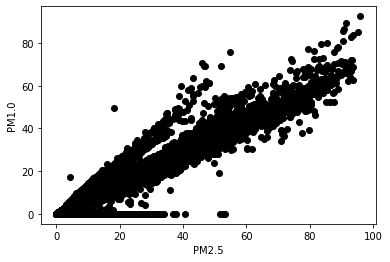

In [227]:
""" 
Question 2:
"""

# Is the PM2.5 related to PM1.0?
# You should choose and create a visualization to support your answer. (15pts)

# delete unnecessary columns, only keep siteID, PM1.0 and PM2.5
pm2510 = airBox.drop(columns=["year","month","day","hour","weekday","gps_lat","gps_lon","PM10","Tmp","RH"])

# some variables
pm25 = pm2510["PM2.5"].tolist()
pm10 = pm2510["PM1.0"].tolist()


# output the result
plt.plot(pm25,pm10,'o',color='black')
plt.xlabel('PM2.5')
plt.ylabel('PM1.0')
plt.show()

In [228]:
# Oberving the result
print("As we can see, when PM2.5 increases, PM1.0 also increases,")
print("so we can say that PM2.5 is highly related to PM1.0 :)")

As we can see, when PM2.5 increases, PM1.0 also increases,
so we can say that PM2.5 is highly related to PM1.0 :)


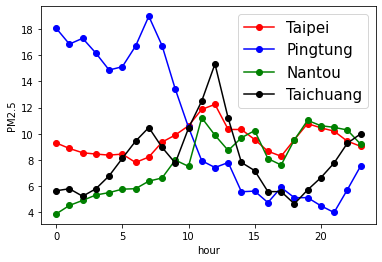

In [249]:
# Among Taipei, Pingtung, Nantou and Taichuang, which city has the most significant difference PM2.5 change pattern over the whole day on July 24 from the other three cities?
# You should choose and create a visualization to support your answer. (15p)

tpntPM25 = airBox.groupby("day")

# variables
hour = [i for i in range(0,24)]
taipei = []
pingtung = []
nantou = []
taichuang = []

# group the data by city
july24 = tpntPM25.get_group(24).groupby("area")

# taipei
temp = july24.get_group("taipei").groupby("hour")
for i in range(0,24):
    taipei.append(temp.get_group(i)["PM2.5"].mean())
    
# pingtung  
temp = july24.get_group("pingtung").groupby("hour")
for i in range(0,24):
    pingtung.append(temp.get_group(i)["PM2.5"].mean())

# nantou
temp = july24.get_group("nantou").groupby("hour")
for i in range(0,24):
    nantou.append(temp.get_group(i)["PM2.5"].mean())

# taichuang
temp = july24.get_group("taichuang").groupby("hour")
for i in range(0,24):
    taichuang.append(temp.get_group(i)["PM2.5"].mean())


# output the result
plt.plot(hour,taipei,'o-',color='red',label="Taipei")
plt.plot(hour,pingtung,'o-',color='blue',label="Pingtung")
plt.plot(hour,nantou,'o-',color='green',label="Nantou")
plt.plot(hour,taichuang,'o-',color='black',label="Taichuang")
plt.xlabel('hour')
plt.ylabel('PM2.5')
plt.legend(loc = "best", fontsize=15)
plt.show()


In [250]:
# Observing the result
print("It's obvious that pingtung has  the most significant difference PM2.5 change pattern over the whole day on July 24.")

It's obvious that pingtung has  the most significant difference PM2.5 change pattern over the whole day on July 24.


In [254]:
# (Assume we only consider PM2.5 to evaluate the air quality) Please implement the following steps to answer which city (Taipei or Tainan) has a better air quality. (20pts)
# –Remove all records whose PM2.5 is 0 (simple data cleaning process to remove impossible data values)

filter = ( airBox["PM2.5"] > 0 )
tptnPM25 = airBox[filter].groupby("area")

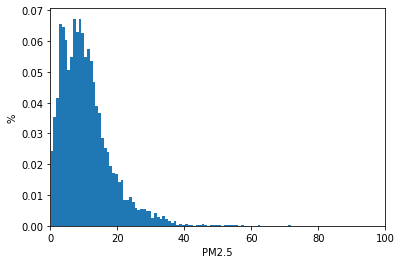

In [284]:
# –Collect all records from Taipei and draw a histogram to shows how many hour PM2.5 records in each histogram bin interval. Set the histogram bin count to 100, the min value to 0 and max value to 100 to create the histogram.
taipeiPM25 = tptnPM25.get_group("taipei")

x_taipei = taipeiPM25["PM2.5"].tolist()
plt.hist(x_taipei,bins=100,density=True)
plt.xlabel("PM2.5")
plt.ylabel("%")
plt.xlim(0,100)
plt.show()

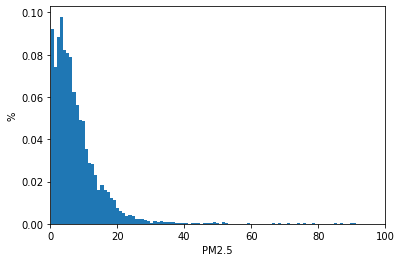

In [283]:
# –Repeat the above step to draw a histogram for Tainan.
tainanPM25 = tptnPM25.get_group("tainan")

x_tainan = tainanPM25["PM2.5"].tolist()
plt.hist(x_tainan,bins=100,density=True)
plt.xlabel("PM2.5")
plt.ylabel("%")
plt.xlim(0,100)
plt.show()

In [ ]:
# –Observe these two histograms to answer which city has a better air quality in the time span of the dataset and explain your answer
print("The histogram trend of Tainan stays lefter than Taipei, which represent the fewer PM2.5,")
print("so we can say that Tainan's average air quality is better than Taipei, since its PM2.5 average is smaller.")